In [3]:
import sys; sys.path.insert(0, "..")  # fmt:skip

from parse_scrape import parse_scrape
from datetime import datetime, time
from pytz import timezone

matches = [
    match
    for match in parse_scrape("../scrape.jsonl")
    if match.time
    >= datetime.combine(datetime(2023, 1, 1), time.min, tzinfo=timezone("US/Pacific"))
]

In [4]:
from constants import *
from config import PLAYER_NAMES

In [26]:
# Number of rounds I played with each person

sorted(
    {
        player_name: sum(
            [
                len(match.rounds)
                for match in matches
                if match.players_in_same_team(STEVEN, player_name)
            ]
        )
        for player_name in PLAYER_NAMES
    }.items(),
    key=lambda x: -x[1],
)

[('steven', 1312),
 ('sophie', 693),
 ('lindsey', 622),
 ('darwin', 530),
 ('josh', 459),
 ('steve', 445),
 ('sun', 277),
 ('brian', 265),
 ('cade', 265),
 ('susi', 237),
 ('elke', 231),
 ('tang', 207),
 ('brandon', 154),
 ('bree', 97),
 ('yang', 64),
 ('iram', 22),
 ('jason', 0),
 ('susu', 0)]

In [4]:
# 9-3 games

for match in matches:
    if len(match.rounds) > 12:
        red = sum([1 for round in match.rounds[:12] if round.winning_team == "red"])
        blue = sum([1 for round in match.rounds[:12] if round.winning_team == "blue"])
        if red == 9 or blue == 9:
            print(match.url)

https://tracker.gg/valorant/match/953472e5-4fc4-42dc-a387-99d3839472c2
https://tracker.gg/valorant/match/7433d77b-cfb1-4194-99b3-4635e67f4c45
https://tracker.gg/valorant/match/5d04b37c-2253-48bd-aedc-188483157600
https://tracker.gg/valorant/match/2b2643a7-490d-4695-af1e-183dd5fb09b0
https://tracker.gg/valorant/match/efe64592-b7ef-4124-ac6a-bee0a8ea9c46
https://tracker.gg/valorant/match/8855c889-f69c-4415-a463-adef4772c1c4
https://tracker.gg/valorant/match/32e6bfb6-4dc4-45e5-9df7-fa04fb7ddf61
https://tracker.gg/valorant/match/bee79b3f-5f47-4b78-8017-2a5e5c882426
https://tracker.gg/valorant/match/36133877-7ddd-4c22-bedf-5adea4400788
https://tracker.gg/valorant/match/a996d6b4-eb28-4b1e-bfe5-02a921a4d540
https://tracker.gg/valorant/match/0d3ee71d-b8d6-4e54-9fbf-dde0a1aa3bf7
https://tracker.gg/valorant/match/79827dba-a9c0-4bae-82af-47df6cc5c30a


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


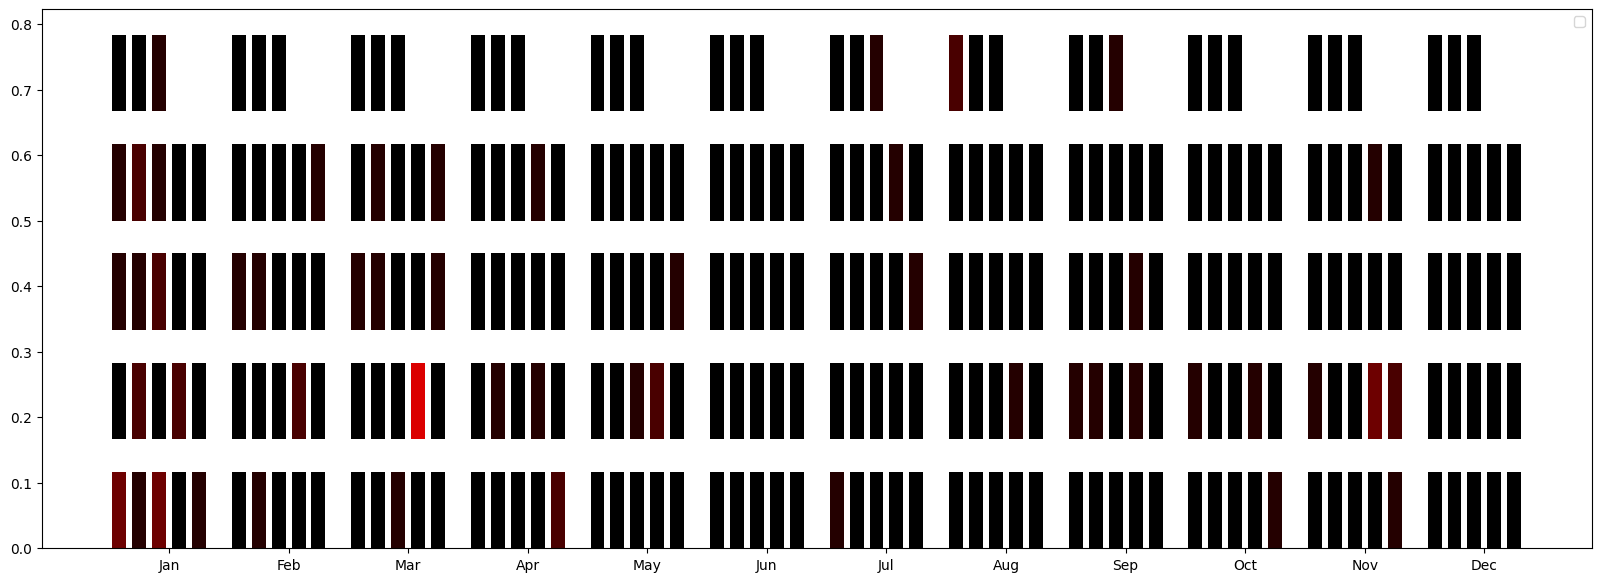

In [65]:
# Top played agent by month

import matplotlib.pyplot as plt
import numpy as np
import math

player_name = DARWIN

months = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
]
agent_counts = {
    agent_name: np.array([0 for _ in range(len(months))]) for agent_name in AGENT_NAMES
}

for match in matches:
    if match.player_did_play(player_name):
        i = match.time.month - 1
        agent_counts[match.all_players[player_name].agent][i] += 1

fig = plt.figure(figsize=(20, 7))
ax = fig.add_subplot()

n_cols = 5
n_rows = math.ceil(len(AGENT_NAMES) / 5)


def rc(i):
    return i // n_rows, i % n_cols

color_map = np.array([(r, 0, 0) for r in np.linspace(0, 1, 8)])

width = 1 / (n_cols + 1)
padding = 0.05
x = np.arange(len(months))
for i, agent_name in enumerate(AGENT_NAMES):
    r, c = rc(i)
    ax.bar(
        x + width * c,
        width - padding,
        width - padding,
        width * r,
        color=color_map[agent_counts[agent_name]],
    )

ax.set_xticks(x + 2.5 * width, months)
ax.legend()
plt.show()

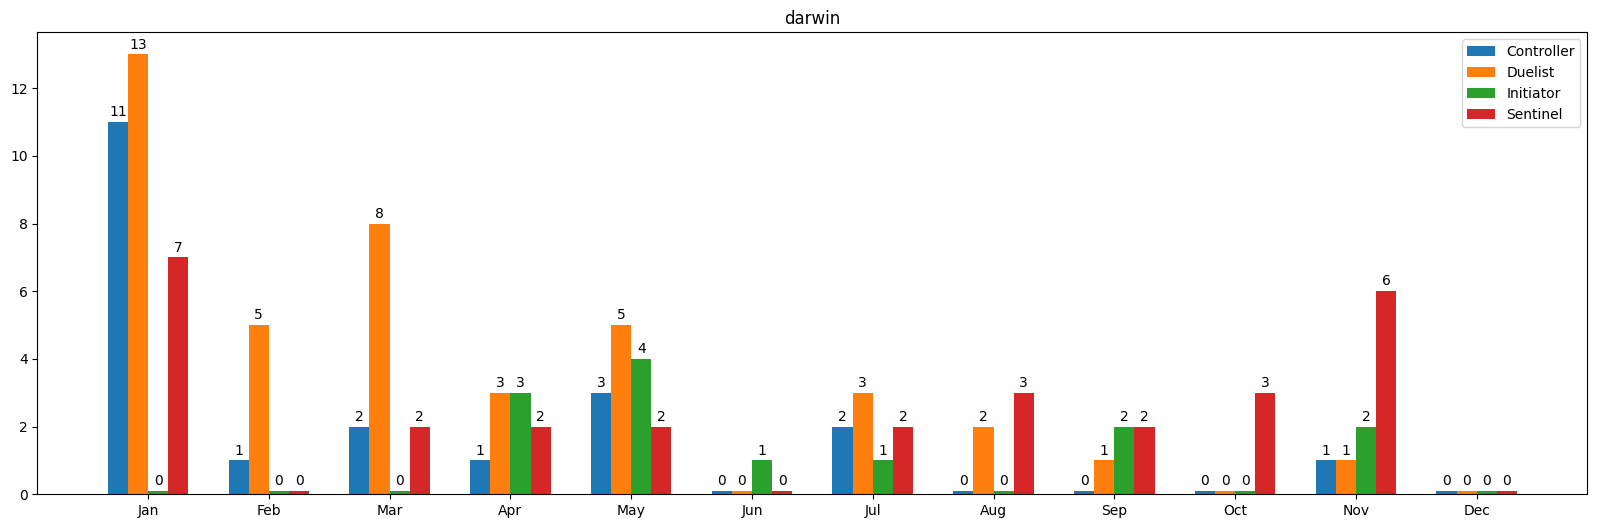

In [ ]:
# Top played agent by month

import matplotlib.pyplot as plt
import numpy as np

player_name = DARWIN

months = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
]
role_count = {role_name: [0 for _ in range(len(months))] for role_name in ROLE_NAMES}

for match in matches:
    if match.player_did_play(player_name):
        i = match.time.month - 1
        role_count[AGENT_NAME_TO_ROLE[match.all_players[player_name].agent]][i] += 1

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)

width = 1 / (len(ROLE_NAMES) + 2)
x = np.arange(len(months))

for i, (role, counts) in enumerate(role_count.items()):
    offset = width * i
    rects = ax.bar(x + offset, np.maximum(0.1, np.array(counts)), width, label=role)
    ax.bar_label(rects, padding=2, fmt="%.0f")

ax.set_xticks(x + 1.5 * width, months)
ax.legend()
plt.title(player_name)
plt.show()